In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Column Description

* sku – 		 	Random ID for the product
* national_inv –   	Current inventory level for the part
* lead_time – 	 	Transit time for product (if available)
* in_transit_qty – 	Amount of product in transit from source
* forecast_3_month – 	Forecast sales for the next 3 months
* forecast_6_month – 	Forecast sales for the next 6 months
* forecast_9_month – 	Forecast sales for the next 9 months
* sales_1_month – 	Sales quantity for the prior 1 month time period
* sales_3_month – 	Sales quantity for the prior 3 month time period
* sales_6_month – 	Sales quantity for the prior 6 month time period
* sales_9_month – 	Sales quantity for the prior 9 month time period
* min_bank – 		Minimum recommend amount to stock
* potential_issue – 	Source issue for part identified
* pieces_past_due – 	Parts overdue from source
* perf_6_month_avg – 	Source performance for prior 6 month period
* perf_12_month_avg – 	Source performance for prior 12 month period
* local_bo_qty – 		Amount of stock orders overdue
* deck_risk – 		Part risk flag
* oe_constraint – 	Part risk flag
* ppap_risk – 		Part risk flag
* stop_auto_buy – 	Part risk flag
* rev_stop – 		Part risk flag
* went_on_backorder – 	Product actually went on backorder. This is the target value.

In [2]:
df = pd.read_csv('Training_Dataset_v2.csv')

/home/akhil/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

In [5]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [6]:
df.shape

(1687861, 23)

### Checking for missing values

In [7]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

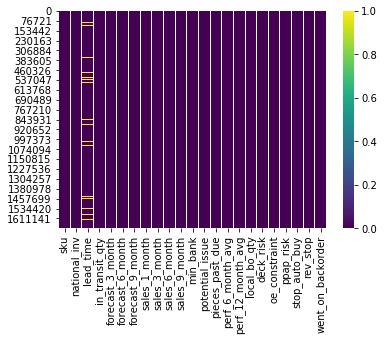

In [8]:
sns.heatmap(df.isnull(), cmap='viridis')

In [9]:
null_values = [feature for feature in df.columns if df[feature].isnull().sum()]

In [10]:
null_values

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'potential_issue',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [11]:
df['national_inv'] = df['national_inv'].fillna(df['national_inv'].mean())
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].mean())
df['in_transit_qty'] = df['in_transit_qty'].fillna(df['in_transit_qty'].mean())
df['forecast_3_month'] = df['forecast_3_month'].fillna(df['forecast_3_month'].mean())
df['forecast_6_month'] = df['forecast_6_month'].fillna(df['forecast_6_month'].mean())
df['forecast_9_month'] = df['forecast_9_month'].fillna(df['forecast_9_month'].mean())
df['sales_1_month'] = df['sales_1_month'].fillna(df['sales_1_month'].mean())
df['sales_3_month'] = df['sales_3_month'].fillna(df['sales_3_month'].mean())
df['sales_6_month'] = df['sales_6_month'].fillna(df['sales_6_month'].mean())
df['sales_9_month'] = df['sales_9_month'].fillna(df['sales_9_month'].mean())
df['pieces_past_due'] = df['pieces_past_due'].fillna(df['pieces_past_due'].mean())
df['perf_6_month_avg'] = df['perf_6_month_avg'].fillna(df['perf_6_month_avg'].mean())
df['perf_12_month_avg'] = df['perf_12_month_avg'].fillna(df['perf_12_month_avg'].mean())
df['local_bo_qty'] = df['local_bo_qty'].fillna(df['local_bo_qty'].mean())
df['min_bank'] = df['min_bank'].fillna(df['min_bank'].mean())

In [12]:
categorical_col = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_col

['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [13]:
df.potential_issue.unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df.potential_issue.value_counts()

No     1686953
Yes        907
Name: potential_issue, dtype: int64

In [15]:
df['potential_issue'] = df.potential_issue.fillna('No')

In [16]:
df.potential_issue.value_counts()

No     1686954
Yes        907
Name: potential_issue, dtype: int64

In [17]:
df['deck_risk'] = df.deck_risk.fillna('No')

In [18]:
df.oe_constraint.value_counts()

No     1687615
Yes        245
Name: oe_constraint, dtype: int64

In [19]:
df['oe_constraint'] = df.oe_constraint.fillna('No')

In [20]:
df.ppap_risk.value_counts()

No     1484026
Yes     203834
Name: ppap_risk, dtype: int64

In [21]:
df['ppap_risk'] = df.ppap_risk.fillna('No')

In [22]:
df.stop_auto_buy.value_counts()

Yes    1626774
No       61086
Name: stop_auto_buy, dtype: int64

In [23]:
df['stop_auto_buy'] = df.stop_auto_buy.fillna('No')

In [24]:
df.rev_stop.value_counts()

No     1687129
Yes        731
Name: rev_stop, dtype: int64

In [25]:
df['rev_stop'] = df.rev_stop.fillna('No')

In [26]:
df.went_on_backorder.value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [27]:
df['went_on_backorder'] = df.went_on_backorder.fillna('No')

In [28]:
df.isnull().any()

sku                  False
national_inv         False
lead_time            False
in_transit_qty       False
forecast_3_month     False
forecast_6_month     False
forecast_9_month     False
sales_1_month        False
sales_3_month        False
sales_6_month        False
sales_9_month        False
min_bank             False
potential_issue      False
pieces_past_due      False
perf_6_month_avg     False
perf_12_month_avg    False
local_bo_qty         False
deck_risk            False
oe_constraint        False
ppap_risk            False
stop_auto_buy        False
rev_stop             False
went_on_backorder    False
dtype: bool

In [29]:
categorical_col

['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

### Label Encoding the categorical values

In [30]:
df.potential_issue.value_counts()

No     1686954
Yes        907
Name: potential_issue, dtype: int64

In [31]:
df['potential_issue'] = df['potential_issue'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['deck_risk'] = df['deck_risk'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['oe_constraint'] = df['oe_constraint'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['ppap_risk'] = df['ppap_risk'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['stop_auto_buy'] = df['stop_auto_buy'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['went_on_backorder'] = df['went_on_backorder'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['rev_stop'] = df['rev_stop'].map({'No' : 0, 'Yes' : 1}).astype('int')

In [32]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687861 non-null float64
lead_time            1687861 non-null float64
in_transit_qty       1687861 non-null float64
forecast_3_month     1687861 non-null float64
forecast_6_month     1687861 non-null float64
forecast_9_month     1687861 non-null float64
sales_1_month        1687861 non-null float64
sales_3_month        1687861 non-null float64
sales_6_month        1687861 non-null float64
sales_9_month        1687861 non-null float64
min_bank             1687861 non-null float64
potential_issue      1687861 non-null int64
pieces_past_due      1687861 non-null float64
perf_6_month_avg     1687861 non-null float64
perf_12_month_avg    1687861 non-null float64
local_bo_qty         1687861 non-null float64
deck_risk            1687861 non-null int64
oe_constraint        1687861 non-null int64
ppap_risk           

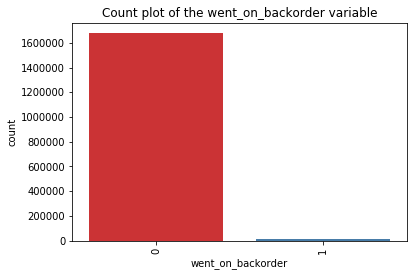

In [34]:
sns.countplot(df['went_on_backorder'], palette='Set1')
plt.title("Count plot of the went_on_backorder variable")
plt.xticks(rotation = 90)
plt.show()

* We can see that our dataset is imbalanced so we need to balance our dataset first

In [35]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


In [36]:
df = df.drop(['sku'], axis=1)

In [37]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


In [38]:
x = df.drop(['went_on_backorder'], axis=1)
y = df['went_on_backorder']

In [39]:
x.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: went_on_backorder, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
x_train_res.shape, y_train_res.shape

((2246690, 21), (2246690,))

In [51]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 1676568, 1: 11293})
Resampled dataset shape Counter({0: 1123345, 1: 1123345})


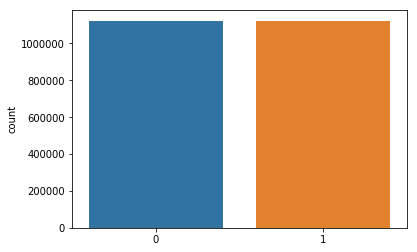

In [72]:
sns.countplot(y_train_res)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(x_train))}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [56]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

print_score(tree, x_train, y_train, x_test, y_test, train=True)
print_score(tree, x_train, y_train, x_test, y_test, train=False)

Train Result:
accuracy score: 0.9996

Classification Report: 
 	Precision: 0.996489750070205
	Recall Score: 0.9436245180162213
	F1 score: 0.9693368845181999

Confusion Matrix: 
 [[1123320      25]
 [    424    7097]]

Test Result:
accuracy score: 0.9917557608237058

Classification Report: 
 	Precision: 0.3931735278791037
	Recall Score: 0.40005302226935313
	F1 score: 0.3965834428383706

Confusion Matrix: 
 [[550894   2329]
 [  2263   1509]]



In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

print_score(rf, x_train, y_train, x_test, y_test, train=True)
print_score(rf, x_train, y_train, x_test, y_test, train=False)

Train Result:
accuracy score: 0.9996

Classification Report: 
 	Precision: 0.9946830838113894
	Recall Score: 0.9452200505251961
	F1 score: 0.9693209708208345

Confusion Matrix: 
 [[1123307      38]
 [    412    7109]]

Test Result:
accuracy score: 0.9946426808140109

Classification Report: 
 	Precision: 0.8947895791583166
	Recall Score: 0.23674443266171794
	F1 score: 0.3744234800838574

Confusion Matrix: 
 [[553118    105]
 [  2879    893]]



In [59]:
import xgboost as xgb

xg_boost = xgb.XGBClassifier(random_state=42)
xg_boost.fit(x_train, y_train)

print_score(xg_boost, x_train, y_train, x_test, y_test, train=True)
print_score(xg_boost, x_train, y_train, x_test, y_test, train=False)

/home/akhil/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/akhil/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Train Result:
accuracy score: 0.9943

Classification Report: 
 	Precision: 0.9060205580029369
	Recall Score: 0.1640739263395825
	F1 score: 0.2778340650681076

Confusion Matrix: 
 [[1123217     128]
 [   6287    1234]]

Test Result:
accuracy score: 0.993545723031625

Classification Report: 
 	Precision: 0.6698656429942419
	Recall Score: 0.09252386002120891
	F1 score: 0.16259026321919404

Confusion Matrix: 
 [[553051    172]
 [  3423    349]]



## Plotting the ROC curve

In [60]:
rf_probs = rf.predict_proba(x_test)[:,1]
dtree_probs = tree.predict_proba(x_test)[:,1]
xgb_probs = xg_boost.predict_proba(x_test)[:,1]

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

In [62]:
print('roc_auc_score for Random forest: ', roc_auc_score(y_test, rf_probs))
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, dtree_probs))
print('roc_auc_score for XGBoost: ', roc_curve(y_test, xgb_probs))

roc_auc_score for Random forest:  0.9668019010737251
roc_auc_score for Decision Tree:  0.7147441424659958
roc_auc_score for XGBoost:  (array([0.00000000e+00, 0.00000000e+00, 1.80758934e-06, ...,
       9.99958425e-01, 9.99963848e-01, 1.00000000e+00]), array([0.00000000e+00, 2.65111347e-04, 2.65111347e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), array([1.9609549e+00, 9.6095490e-01, 9.5079678e-01, ..., 1.5144546e-07,
       1.4942790e-07, 7.2262750e-08], dtype=float32))


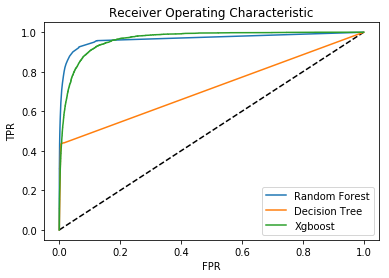

In [64]:
from sklearn.metrics import roc_curve
y_pred_prob1 = rf.predict_proba(x_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, rf_probs)

y_pred_prob2 = tree.predict_proba(x_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, dtree_probs)


y_pred_prob3 = xg_boost.predict_proba(x_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, xgb_probs)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Random Forest")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "Xgboost")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [ ]:
# kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
# pred_test_full =0
# cv_score =[]
# i=1
# for train_index,test_index in kf.split(x,y):
#     print('{} of KFold {}'.format(i,kf.n_splits))
#     xtr,xvl = x.loc[train_index],x.loc[test_index]
#     ytr,yvl = y.loc[train_index],y.loc[test_index]
    
#     #model
#     tree = DecisionTreeClassifier()
#     tree.fit(xtr,ytr)
#     score = roc_auc_score(yvl,tree.predict(xvl))
#     print('ROC AUC score:',score)
#     cv_score.append(score)    
#     pred_test = tree.predict_proba(x_test)[:,1]
#     pred_test_full +=pred_test
#     i+=1